<a href="https://colab.research.google.com/github/DeeS17/statistical_data_analysis/blob/main/sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Konten
* Tahap 1: Pra-pemrosesan Data
    * Memuat Data
    * Mengeksplorasi Data Awal
        * Calls
        * Internet
        * Messages
        * Plan
        * Users
    * Mengkonversikan Tipe Data dan Satuan yang Sesuai
        * Calls
        * Internet
        * Messages
    * Menggabungkan Dataframe
        * Menggabungkan antara internet dengan calls
        * Menggabungkan antara internet dan calls dengan messages
        * Menggabungkan antara internet, calls, dan messages dengan users
    * Menambahkan Kolom Pendapatan Bulanan dari Setiap Konsumen
* Tahap 2: Analisa Data
    * Melihat Perilaku Konsumen
        * Calls
            * Mean of Call Duration by Month
            * Variance of Call Duration by Month
            * Standart Deviation of Call Duration by Month
        * Messages
            * Mean of Messages Count by Month
            * Variance of Messages Count by Month
            * Standart Deviation of Messages Count by Month
        * Internet
            * Mean of Gigabyte Used by Month
            * Variance of Gigabyte Used by Month
            * Standart Deviation of Gigabyte Used by Month
* Tahap 3: Uji Hipotesis
    * Pendapatan Megaline dari Konsumen Ultimate Lebih Besar Dibandingkan Pendapatan Dari Konsumen Surf
    * Pendapatan Konsumen dari Area New York-New Jersey Lebih Besar Dibandingkan Pendapatan Konsumen di Area Lainnya
* Kesimpulan

### Pendahuluan

Megaline adalah sebua perusahaan operator telekomunikasi. Perusahaan tersebut menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.

#### Tujuan

Untuk mengetahui paket prabayar mana yang lebih banyak menghasilkan pendapatan, maka saya akan menguji 2 hipotesis:
- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

#### Tahapan
Proyek ini terdiri dari 4 tahapan:
- Pra-pemrosesan Data:  
- Analisa Data
- Uji Hipotesis
- Kesimpulan

## Pra-pemrosesan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as py
import math

### Memuat Data

In [ ]:
try:
  calls = pd.read_csv('/datasets/megaline_calls.csv')
  internet = pd.read_csv('/datasets/megaline_internet.csv')
  messages = pd.read_csv('/datasets/megaline_messages.csv')
  plans = pd.read_csv('/datasets/megaline_plans.csv')
  users = pd.read_csv('/datasets/megaline_users.csv')
except:
  calls = pd.read_csv('/content/megaline_calls.csv')
  internet = pd.read_csv('/content/megaline_internet.csv')
  messages = pd.read_csv('/content/megaline_messages.csv')
  plans = pd.read_csv('/content/megaline_plans.csv')
  users = pd.read_csv('/content/megaline_users.csv')   

### Mengeksplorasi Data Awal

#### calls

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Tidak ada data yang hilang, namun pada kolom `call_date` tipe  datanya masih berupa `object`. Artinya kita perlu sesuaikan tipe datanya menjadi `datetime`. Selain itu `duration` perlu akan dibulatkan keatas, karena `Megaline` membulatkan setiap panggilan menjadi dalam menit.   

#### internet

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Tidak ada data yang hilang, namun namun pada `session_date` tipe datanya `object` dan perlu disesuaikan menjadi `datetime`. Pada kolom `mb_used` nantinya perlu dibulatkan dalam satuan `gigabyte`. Karena `Megaline` membulatkan penggunaan dalam `gigabyte` dalam setiap bulan. Sehingga nanti saya juga perlu menambahkan kolom `month` agar dapat menghitung penggunaan kuota internet dalam `gigabyte` perbulan.

#### messages

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Tidak ada data yang hilang, namun kolom `message_date` tipe datanya masih `object`. Pada tahap selanjutnya akan disesuaikan menjadi `datetime`.

#### plans

In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Data pada `plans` merupakan `dictionary` dari setiap paket prabayar dari operator `megaline`. Tipe datanya sudah sesuai.

#### users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Tabel ini berisi daftar 500 konsumen dari `Megaline`. Pada kolom `reg_date` seharusnya bertipe `datetime`, namun tipenya masih `object`. Hal tersebut akan disesuaikan pada langkah selanjutnya. Pada kolom `churn_date` banyak data yang `NaN`. Data tersebut bukanlah hilang, namun artinya customer masih menggunakan jasa dari `megaline`. Jika datanya bukan `NaN`, artinya itu adalah tanggal terakhir customer menggunakan jasa dari `megaline`.    

### Mengkonversikan Tipe Data dan Satuan yang Sesuai

Dari seluruh dataset yang telah dimuat, ada tiga dataset yang perlu dikonversi dan disesuaikan. Ketiga dataset yang dimaksud yaitu:
- calls
- internet
- messages

#### calls

Langkah pertama yang akan dilakukan adalah mengkonversi kolom `call_date` yang tadinya dari `object` menjadi `datetime`. Setelah tipe data berubah menjadi `datetime`, maka saya dapat membuat kolom bulannya agar dapat menghitung total `duration` perbulan.

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.to_period('M')

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


In [ ]:
calls['duration'] = py.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype(int)

In [ ]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


Kolom `duration` telah berhasil dibulatkan keatas dari durasi telefon customer. Dan kolom `month` telah berhasil ditambahkan agar dapat menghitung total `duration` dalam setiap bulannya.  

In [ ]:
calls.duplicated().sum()

0

Tidak ada nilai duplikat.

In [ ]:
calls_by_month = calls.pivot_table(values='duration', index=['user_id', 'month'], aggfunc='sum')
calls_by_month.reset_index(inplace=True)
calls_by_month

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2253,1498,2018-12,339
2254,1499,2018-09,346
2255,1499,2018-10,385
2256,1499,2018-11,308


Kolom month sudah ditambahkan.

#### internet

Konversi yang dilakukan pada dataset `internet` adalah mengubah tipe data dari kolom `session_date` dan menambahkan kolom `month` agar dapat mengakses bulan untuk menghitung penggunaan `megabyte` per bulan.

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.to_period('M')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


tipe data `session_date` telah berubah menjadi `datetime` dan kolom `month` telah berhasil ditambahkan.

In [ ]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


`mb_used` diatas masih per sesi, perlu disatukan kedalam per bulan sebelum dibulatkan. Sebelum menggabungkan per bulan. Tidak ada keterangan tahun, karena sudah diinformasikan bahwa data yang diolah khusus untuk tahun 2018. Saya akan memeriksa apakah ada duplikat.

In [ ]:
internet.duplicated().sum()

0

tidak ada data duplikat.

In [ ]:
internet_by_month = internet.pivot_table(values='mb_used', index=['user_id', 'month'], aggfunc='sum')
internet_by_month.reset_index(inplace=True)
internet_by_month.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


Penggunaan data konsumen per bulan telah berhasil dibuat datasetnya, namun satuannya masih dalam `megabyte`. Selanjutnya saya akan mengubahnya dalam `gigabyte` dan membulatkan keatas. 

In [ ]:
internet_by_month['mb_used'] = py.ceil(internet_by_month['mb_used'] / 1024)
internet_by_month['mb_used'] = internet_by_month['mb_used'].astype(int)
internet_by_month.columns = ['user_id', 'month', 'gb_used']
internet_by_month.head()

,user_id,month,gb_used
0,1000,2018-12,2
1,1001,2018-08,7
2,1001,2018-09,14
3,1001,2018-10,22
4,1001,2018-11,19


Kolom `mb_used` telah berhasil diubah menjadi `gb_used` dan isinya juga sudah berhasil dikonversikan dan pembulatan keatas dalam `gigabyte`.

In [ ]:
internet_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  2277 non-null   int64    
 1   month    2277 non-null   period[M]
 2   gb_used  2277 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 53.5 KB


#### messages

Langkah konversi dan penyesuaian untuk dataset `message` adalah mengubah data type kolom `message_date`menjadi `datetime`. Selanjutnya menambahkan kolom `month` agar dapat menghitung total `message` per bulan dari setiap konsumen.  

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.to_period('M')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


kolom `month` sudah berhasil ditambahkan.

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


Tipe kolom `message_date`dan kolom `month` juga telah berhasil disesuaikan dan ditambahkan. Selanjutnya saya kan menghitung jumlah `message` per bulan dari setiap konsumen.

In [ ]:
messages_by_month = messages.pivot_table(values='id', index=['user_id', 'month'], aggfunc='count')
messages_by_month.reset_index(inplace=True)
messages_by_month.columns = ['user_id', 'month', 'messages_count']
messages_by_month.head()

,user_id,month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


### Menggabungkan Dataframe

Selanjutnya saya bertujuan untuk menghitung total penggunaan `messages`, `calls`, dan `internet` dari setiap konsumen dalam  setiap bulannya. Karena itu saya perlu menggabungkan ketiga `dataframe` diatas.

Agar dapat melakukan itu saya memerlukan satu kolom yang dapat menghubungkan ketiga `dataframe` tersebut dan mengelompokan penggunaan `messages`, `calls`, dan `internet` dari setiap konsumen dalam setiap bulannya. Sehingga saya akan membuat kolom baru `user_id-month` untuk keperluan tersebut.

#### Menggabungkan antara `internet` dengan `calls`

In [ ]:
calls_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2258 non-null   int64    
 1   month     2258 non-null   period[M]
 2   duration  2258 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 53.0 KB


Ada `2,258` data dari dataframe `calls_by_month`

In [ ]:
internet_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   user_id  2277 non-null   int64    
 1   month    2277 non-null   period[M]
 2   gb_used  2277 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 53.5 KB


Ada `2,277` data kolom dari dataframe `internet_by_month`

In [ ]:
new_df = calls_by_month.merge(internet_by_month, how='outer', on=['user_id', 'month'])
new_df.head()

,user_id,month,duration,gb_used
0,1000,2018-12,124.0,2.0
1,1001,2018-08,182.0,7.0
2,1001,2018-09,315.0,14.0
3,1001,2018-10,393.0,22.0
4,1001,2018-11,426.0,19.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2292 non-null   int64    
 1   month     2292 non-null   period[M]
 2   duration  2258 non-null   float64  
 3   gb_used   2277 non-null   float64  
dtypes: float64(2), int64(1), period[M](1)
memory usage: 89.5 KB


Datasetnya sudah berhasil digabungkan namun perlu disesuaikan tipe datanya dan dirapikan terlebih dahulu. Selain itu dari method `info()` menunjukan ada data yg hilang pada kolom `duration` dan `gb_used`. Artinya pada bulan tertentu ada konsumen yang sama sekali tidak menggunakan layanan panggilan suara atau internet.

In [ ]:
new_df.loc[new_df['duration'].isna(), 'duration'] = 0
new_df.loc[new_df['gb_used'].isna(), 'gb_used'] = 0
new_df['duration'] = new_df['duration'].astype(int)
new_df['gb_used'] = new_df['gb_used'].astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   user_id   2292 non-null   int64    
 1   month     2292 non-null   period[M]
 2   duration  2292 non-null   int64    
 3   gb_used   2292 non-null   int64    
dtypes: int64(3), period[M](1)
memory usage: 89.5 KB


Data yang hilang telah terisi. sehingga dataframe sudah bisa digabungkan dengan `messages_by_month`.

#### Menggabungkan `internet` dan `calls` dengan `messages`

In [ ]:
messages_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         1806 non-null   int64    
 1   month           1806 non-null   period[M]
 2   messages_count  1806 non-null   int64    
dtypes: int64(2), period[M](1)
memory usage: 42.5 KB


Ada `1,806` data kolom dari dataframe `messages_by_month`.

In [ ]:
new_df = new_df.merge(messages_by_month, how='outer', on=['user_id', 'month'])
new_df.head()

,user_id,month,duration,gb_used,messages_count
0,1000,2018-12,124.0,2.0,11.0
1,1001,2018-08,182.0,7.0,30.0
2,1001,2018-09,315.0,14.0,44.0
3,1001,2018-10,393.0,22.0,53.0
4,1001,2018-11,426.0,19.0,36.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month           2293 non-null   period[M]
 2   duration        2292 non-null   float64  
 3   gb_used         2292 non-null   float64  
 4   messages_count  1806 non-null   float64  
dtypes: float64(3), int64(1), period[M](1)
memory usage: 107.5 KB


`messages` telah digabungkan kedalam `dataframe`. Setelah dilihat dari method `info()` ada satu konsumen yang yang hanya menggunakan layanan `messages`, tapi tidak menggunakan `internet` dan `calls`. Selain itu selanjutnya akan saya lakukan adalah menyesuaikan tipe data yang berubah setelah penggabungan.  

In [ ]:
new_df.loc[new_df['duration'].isna(), 'duration'] = 0
new_df.loc[new_df['gb_used'].isna(), 'gb_used'] = 0
new_df.loc[new_df['messages_count'].isna(), 'messages_count'] = 0

In [ ]:
new_df['duration'] =  new_df['duration'].astype(int)
new_df['gb_used'] = new_df['gb_used'].astype(int)
new_df['messages_count'] = new_df['messages_count'].astype(int)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month           2293 non-null   period[M]
 2   duration        2293 non-null   int64    
 3   gb_used         2293 non-null   int64    
 4   messages_count  2293 non-null   int64    
dtypes: int64(4), period[M](1)
memory usage: 107.5 KB


In [ ]:
new_df.head()

,user_id,month,duration,gb_used,messages_count
0,1000,2018-12,124,2,11
1,1001,2018-08,182,7,30
2,1001,2018-09,315,14,44
3,1001,2018-10,393,22,53
4,1001,2018-11,426,19,36


Ketiga `dataframe` tentang penggunaan layanan (`messages`, `calls`, dan `internet`) dari per konsumen dan per bulan telah berhasil digabungkan kedalam satu `dataframe`. Langkah selanjutnya adalah menggabungkan `dataframe` gabungan dengan `dataframe` data konsumen. Langkah ini perlu dilakukan agar data pendapatan `Megaline` dari seluruh layanan yang digunakan oleh konsumen.

#### Menggabungkan `internet`,  `calls`, dan `messages` dengan Data Konsumen (`users`)

In [ ]:
new_df = new_df.merge(users, how='outer', on='user_id')

In [ ]:
new_df.head()

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,2018-10,393.0,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,2018-11,426.0,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2303 non-null   int64    
 1   month           2293 non-null   period[M]
 2   duration        2293 non-null   float64  
 3   gb_used         2293 non-null   float64  
 4   messages_count  2293 non-null   float64  
 5   first_name      2303 non-null   object   
 6   last_name       2303 non-null   object   
 7   age             2303 non-null   int64    
 8   city            2303 non-null   object   
 9   reg_date        2303 non-null   object   
 10  plan            2303 non-null   object   
 11  churn_date      160 non-null    object   
dtypes: float64(3), int64(2), object(6), period[M](1)
memory usage: 233.9+ KB


In [ ]:
new_df.loc[new_df['month'].isna()]

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date
2293,1025,NaT,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaN
2294,1129,NaT,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
2295,1143,NaT,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
2296,1269,NaT,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
2297,1275,NaT,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
2298,1307,NaT,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
2299,1319,NaT,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaN
2300,1378,NaT,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaN
2301,1463,NaT,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN
2302,1473,NaT,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN


In [ ]:
len(new_df.loc[new_df['month'].isna(), 'user_id'].unique())

10

Setela digabungkan, baru terlihat ternyata ada 10 konsumen yang terdaftar pada paket bulanan, tetapi tidak pernah menggunakan layanan sama sekali. Karena jumlah datanya tidak banyak. Maka akan saya kesampingkan terlebih dahulu.

In [ ]:
df_filtered = new_df.loc[new_df['month'].isna() == False].copy()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month           2293 non-null   period[M]
 2   duration        2293 non-null   float64  
 3   gb_used         2293 non-null   float64  
 4   messages_count  2293 non-null   float64  
 5   first_name      2293 non-null   object   
 6   last_name       2293 non-null   object   
 7   age             2293 non-null   int64    
 8   city            2293 non-null   object   
 9   reg_date        2293 non-null   object   
 10  plan            2293 non-null   object   
 11  churn_date      158 non-null    object   
dtypes: float64(3), int64(2), object(6), period[M](1)
memory usage: 232.9+ KB


In [ ]:
df_filtered['duration'] = df_filtered['duration'].astype(int)
df_filtered['gb_used'] = df_filtered['gb_used'].astype(int)
df_filtered['messages_count'] = df_filtered['messages_count'].astype(int)
df_filtered['reg_date'] = pd.to_datetime(df_filtered['reg_date'])
df_filtered.head()

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018-12,124,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,2018-08,182,7,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,2018-09,315,14,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,2018-10,393,22,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,2018-11,426,19,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         2293 non-null   int64         
 1   month           2293 non-null   period[M]     
 2   duration        2293 non-null   int64         
 3   gb_used         2293 non-null   int64         
 4   messages_count  2293 non-null   int64         
 5   first_name      2293 non-null   object        
 6   last_name       2293 non-null   object        
 7   age             2293 non-null   int64         
 8   city            2293 non-null   object        
 9   reg_date        2293 non-null   datetime64[ns]
 10  plan            2293 non-null   object        
 11  churn_date      158 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5), period[M](1)
memory usage: 232.9+ KB


Sekarang datanya sudah bersih. Sekarang saya akan memulai menghitung pendapatan dari setiap konsumen per bulan.

### Pendapatan Bulanan dari Setiap Konsumen

Hal pertama yang saya lakukan adalah membuat fungsi dan menguji fungsi untuk menghitung pendapatan dari setiap konsumen per bulan

In [ ]:
test_df = df_filtered.loc[9].copy()

In [ ]:
def monthly_fee (row) :
    if row['plan'] == 'ultimate':
        return plans['usd_monthly_pay'][1]
    elif row['plan'] == 'surf':
        return plans['usd_monthly_pay'][0]

def calls_fee (row) :
    if row['plan'] == 'ultimate':
        over_quota = row['duration'] - plans['minutes_included'][1] 
        if over_quota > 0 :
            return over_quota * plans['usd_per_minute'][1]
        else :
            return 0
    elif row['plan'] == 'surf':
        over_quota = row['duration'] - plans['minutes_included'][0] 
        if over_quota > 0 :
            return over_quota * plans['usd_per_minute'][0]
        else :
            return 0

def internet_fee(row) :
    if row['plan'] == 'ultimate':
        over_quota = row['gb_used'] - py.floor(plans['mb_per_month_included'][1]/1000)
        if over_quota > 0:
            return over_quota * plans['usd_per_gb'][1]
        else:
            return 0
    elif row['plan'] == 'surf':
        over_quota = row['gb_used'] - py.floor(plans['mb_per_month_included'][0]/1000)
        if over_quota > 0:
            return over_quota * plans['usd_per_gb'][0]
        else:
            return 0

def messages_fee (row) :
    if row['plan'] == 'ultimate':
        over_quota = row['messages_count'] - plans['messages_included'][1]
        if over_quota > 0:
            return over_quota * plans['usd_per_message'][1]
        else:
            return 0 
    elif row['plan'] == 'surf':
        over_quota = row['messages_count'] - plans['messages_included'][0]
        if over_quota > 0:
            return over_quota * plans['usd_per_message'][0]
        else:
            return 0 
        
test_df['monthly_fee'] = monthly_fee(test_df)
test_df['call_over_quota'] = calls_fee(test_df)
test_df['data_over_quota'] = internet_fee(test_df)
test_df['messages_over_quota'] = messages_fee(test_df)
test_df

user_id                               1003
month                              2018-12
duration                              1104
gb_used                                 27
messages_count                          50
first_name                        Reynaldo
last_name                          Jenkins
age                                     52
city                         Tulsa, OK MSA
reg_date               2018-01-28 00:00:00
plan                                  surf
churn_date                             NaN
monthly_fee                             20
call_over_quota                      18.12
data_over_quota                      120.0
messages_over_quota                      0
Name: 9, dtype: object

Fungsi telah berjalan dengan baik. Karena itu saatnya menggunakannya untuk seluruh dataset.

In [ ]:
def rev_per_user_per_month (df) :
    
    df['monthly_fee'] = df.apply(monthly_fee, axis=1)
    df['call_over_quota'] = df.apply(calls_fee, axis=1)
    df['data_over_quota'] = df.apply(internet_fee, axis=1)
    df['messages_over_quota'] = df.apply(messages_fee, axis=1)
    
    df['revenue_per_user_per_month'] = df['monthly_fee'] + df['call_over_quota'] + df['data_over_quota'] + df['messages_over_quota']
    
    return df

df_revenue = rev_per_user_per_month(df_filtered)
df_revenue.head()

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month
0,1000,2018-12,124,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70,0.0,0.0,0.00,70.00
1,1001,2018-08,182,7,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,0.0,0.00,20.00
2,1001,2018-09,315,14,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,0.0,0.00,20.00
3,1001,2018-10,393,22,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,70.0,0.09,90.09
4,1001,2018-11,426,19,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,40.0,0.00,60.00


Nilai pendapatan per konsumen setiap bulannya sudah ditambahkan kedalam dataframe.

Sebelum memulai analisa data. Saya kan melihat terlebih dahulu apakah ada data yang janggal. Yang dimaksud janggal adalah:
- Data yang waktu transaksinya sebelum waktu registrasi.
- Data yang waktu transaksinya setelah waktu berhenti dari layanan.

In [ ]:
df_revenue['reg_month'] = df_revenue['reg_date'].dt.to_period('M')
df_revenue['churn_month'] = pd.to_datetime(df_revenue['churn_date']).dt.to_period('M')
df_revenue.head()

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month,reg_month,churn_month
0,1000,2018-12,124,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70,0.0,0.0,0.00,70.00,2018-12,NaT
1,1001,2018-08,182,7,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,0.0,0.00,20.00,2018-08,NaT
2,1001,2018-09,315,14,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,0.0,0.00,20.00,2018-08,NaT
3,1001,2018-10,393,22,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,70.0,0.09,90.09,2018-08,NaT
4,1001,2018-11,426,19,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20,0.0,40.0,0.00,60.00,2018-08,NaT


Untuk melakukan pemeriksaan saya membutuhkan kolom `reg month` dan `churn month` untuk dibandingkan dengan kolom `month.

In [ ]:
df_revenue.loc[(df_revenue['month'] < df_revenue['reg_month']) & (df_revenue['month'] > df_revenue['churn_month'])]

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month,reg_month,churn_month


Setelah dilakukan pemeriksaan tidak ditemukan data yang janggal. 

## Analisa Data

### Melihat Perilaku Konsumen

Pada bagian ini saya kan mencari tahu perilaku dari konsumen. Saya akan melihat penggunaan `panggilan suara`, `internet`, dan `pesan teks` per bulan dari setiap paket yang ada.

#### Calls

Sebelum melakukan hal analisa, saya akan melihat apakah banyak nilai `outlier` distribusi `duration`.

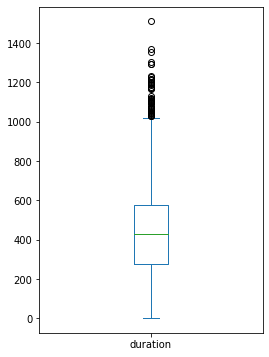

In [ ]:
df_revenue.loc[df_revenue['duration'] > 0, 'duration'].plot.box(figsize=(4,6))
plt.show()

Ternyata cukup banyak nilai `outlier` diatas batas `upper whisker`. Karena itu saya akan melihat persisnya posisi `upper whisker`.  

In [ ]:
df_revenue['duration'].describe()

count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: duration, dtype: float64

In [ ]:
def find_upper_whisker (df_desc) :
    IQR = df_desc['75%'] - df_desc['25%']
    Q3 = df_desc['75%']
    upper_whisker = Q3 + IQR*1.5
    
    return upper_whisker
    

upper_whisker = find_upper_whisker(df_revenue['duration'].describe())
upper_whisker

1032.5

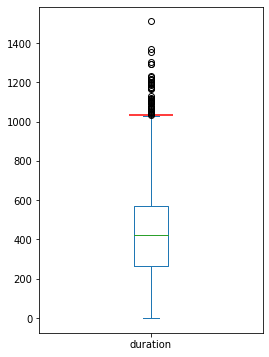

In [ ]:
df_revenue['duration'].plot.box(figsize=(4,6))
plt.hlines(upper_whisker, xmin=0.9, xmax=1.1, color='red')
plt.show()

`Upper Whisker` berada diangka `1032.5` sesuai dengan teori. Selanjutnya saya akan melakukan filter `duration` diatas `upper whisker`. Hal ini perlu dilakukan karena `outlier` dapat mempengaruhi nilai `mean`.

In [ ]:
analyze_call = df_revenue.loc[df_revenue['duration'] <= upper_whisker].copy()
analyze_call.loc[analyze_call['duration'] > upper_whisker]

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month,reg_month,churn_month


Data `outlier` diatas nilai `upper whisker` telah tidak ada. 

##### Mean of Call Duration by Month

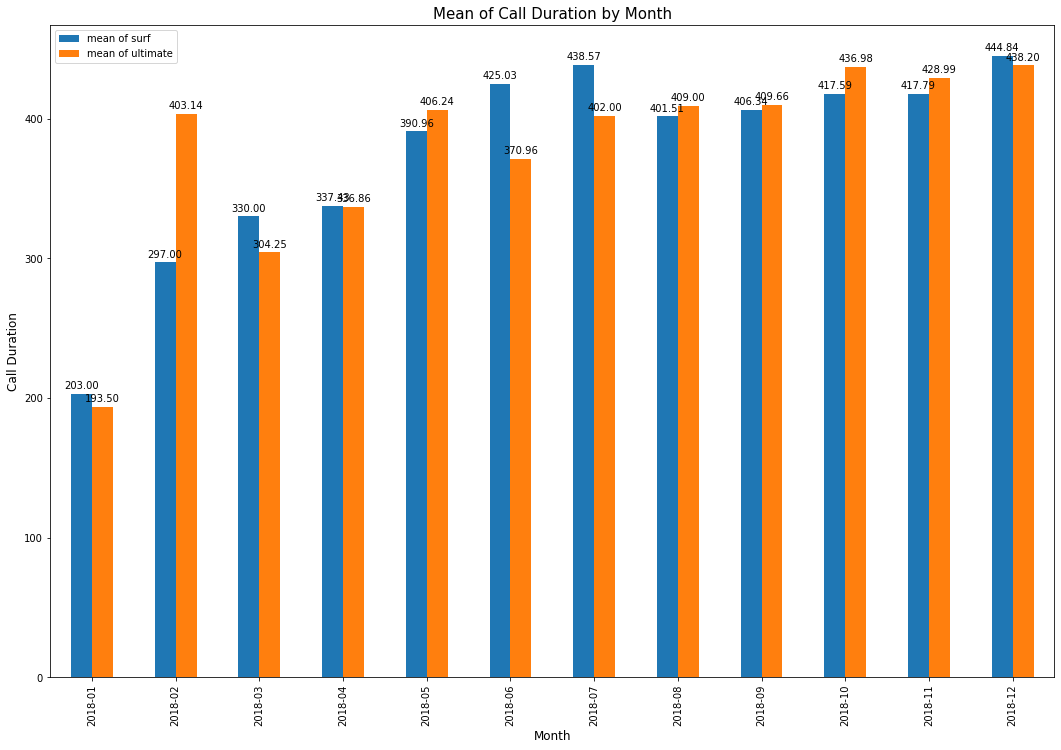

In [ ]:
calls_behavior =  analyze_call.pivot_table(index=['month'], columns = ['plan'], values='duration', aggfunc=['mean'])

calls_behavior.columns = ['mean of surf', 'mean of ultimate']
plots = calls_behavior.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Call Duration', size=12)
plt.xlabel('Month', size=12)
plt.title('Mean of Call Duration by Month', size=15)

plt.show()

`Call Duration` pada semester kedua secara umum terlihat lebih banyak dibandingkan pada semester pertama. Pada bulan kedua pada paket `ultimate` mengalami lonjakan. Rata-rata `call duration` dari seluruh bulan tidak ada yang mencapai `500 menit`. Artinya masih dibawah dari kuota paket `surf` dan masih jauh dari kuota paket `ultimate`, `3000 menit`.

##### Variance of Call Duration by Month

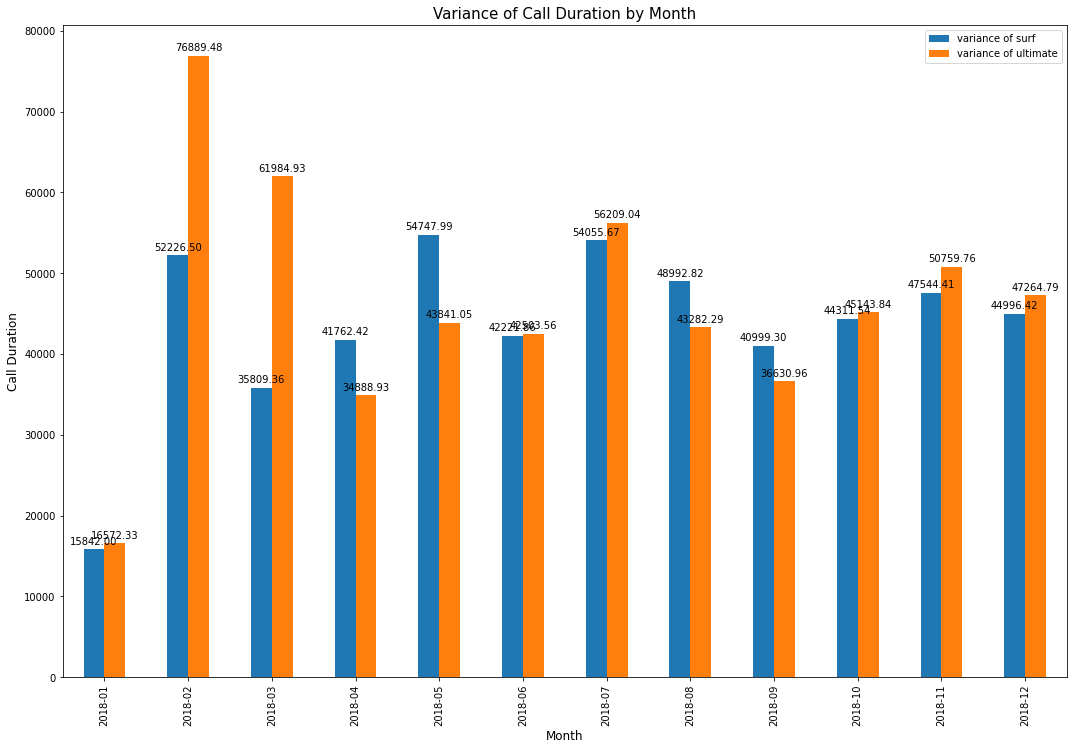

In [ ]:
calls_behavior2 =  analyze_call.pivot_table(index=['month'], columns = ['plan'], values='duration', aggfunc=[py.var])
calls_behavior2.columns = ['variance of surf', 'variance of ultimate']
plots = calls_behavior2.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Call Duration', size=12)
plt.xlabel('Month', size=12)
plt.title('Variance of Call Duration by Month', size=15)

plt.show()

disparitas atau persebaran tertinggi ada pada konsumen pake `ultimate` dibulan kedua. Hal tersebut mungkin menjadi faktor yang membuat `mean` `call duration` paket `ultimate` melonjak dibulan kedua. Namun, tingginya nilai `variance` tidak menjamin tingginya nilai `mean`. Karena pada bulan ketiga pada paket `ultimate` merupakan `variance` kedua tertinggi, namun `mean` nya tidak mengikuti.

Selain itu pada semester kedua, perbedaan `variance` antara kedua paket cenderung lebih kecil dibandingkan pada semester pertama.

##### Standart Deviation of Call Duration by Month

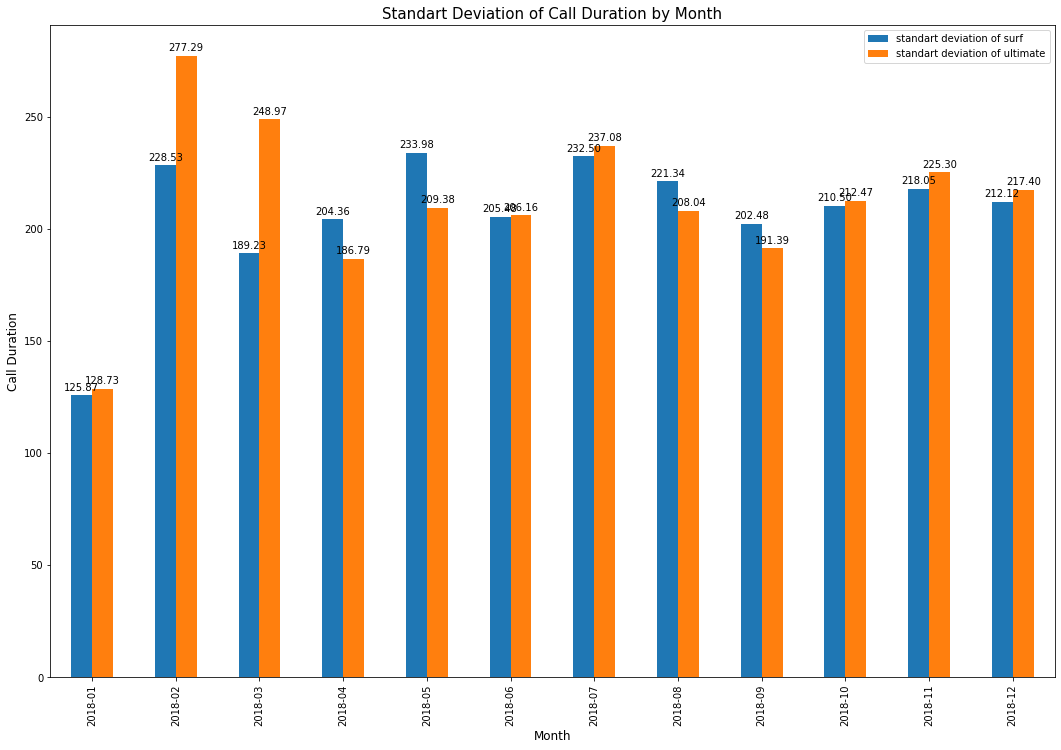

In [ ]:
calls_behavior3 =  analyze_call.pivot_table(index=['month'], columns = ['plan'], values='duration', aggfunc=[py.std])
calls_behavior3

calls_behavior3.columns = ['standart deviation of surf', 'standart deviation of ultimate']
plots = calls_behavior3.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Call Duration', size=12)
plt.xlabel('Month', size=12)
plt.title('Standart Deviation of Call Duration by Month', size=15)

plt.show()

Polanya kurang lebih serupa dengan `variance` karena `standart deviation` adalah akar dari `variance`. Nilai simpangan tertinggi pada paket `ultimate` dibulan kedua yang nilainya sebesar `277.29`.

#### Messages

Sama seperti sebelumnya. Pertama saya akan melihat apakah ada nilai `outlier`.

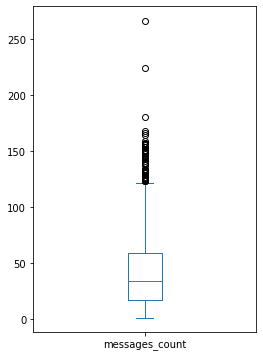

In [ ]:
df_revenue.loc[df_revenue['messages_count'] > 0, 'messages_count'].plot.box(figsize=(4,6))
plt.show()

ada nilai `outlier`nya. Karena itu saya akan melihat nilai `upper whisker`nya. 

In [ ]:
messages_desc = df_revenue.loc[df_revenue['messages_count'] > 0, 'messages_count'].describe()
messages_desc

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: messages_count, dtype: float64

In [ ]:
upper_whisker = find_upper_whisker(messages_desc)
upper_whisker

122.0

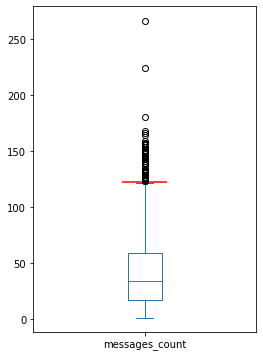

In [ ]:
df_revenue.loc[df_revenue['messages_count'] > 0, 'messages_count'].plot.box(figsize=(4,6))
plt.hlines(upper_whisker, xmin=0.9, xmax=1.1, color='red')
plt.show()

`Upper whisker` berada pada `122`, sesuai dengan teori. Selanjutnya saya kan melakukan filter untuk nilai diatas `upper whisker`, karena nilai `outlier` dapat mempengaruhi nilai `mean`.

In [ ]:
analyze_messages = df_revenue.loc[(df_revenue['messages_count'] <= upper_whisker) & (df_revenue['messages_count'] > 0)].copy()
analyze_messages.loc[analyze_messages['messages_count'] > upper_whisker]

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month,reg_month,churn_month


Nilai `outlier` diatas `upper whisker` telah tidak ada. Saatnya melanjutnya ke tahap analisis. 

##### Mean of Messages Count by Month

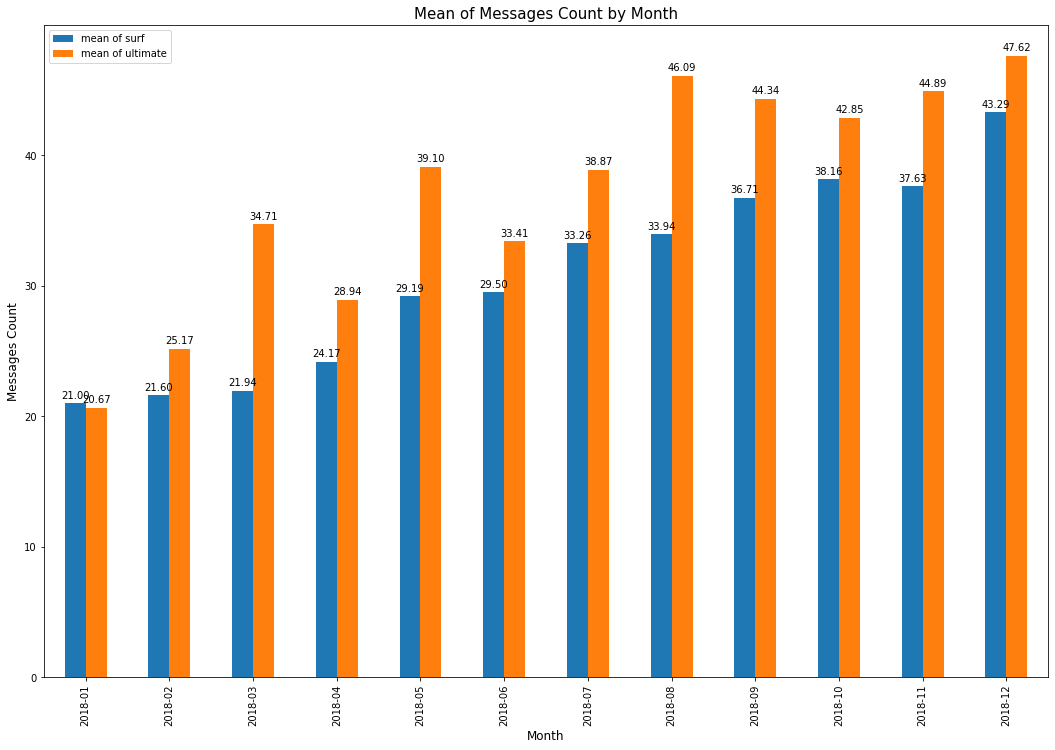

In [ ]:
messages_behavior =  analyze_messages.pivot_table(index=['month'], columns = ['plan'], values='messages_count', aggfunc=['mean'])

messages_behavior.columns = ['mean of surf', 'mean of ultimate']
plots = messages_behavior.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Messages Count', size=12)
plt.xlabel('Month', size=12)
plt.title('Mean of Messages Count by Month', size=15)

plt.show()

Secara umum dari bulan pertama hingga ke bulan dua belas cenderung terjadi peningkatan bertahap dari penggunaan layanan `messages`. Rata-rata tertinggi penggunaan `messages` per bulan berada pada angka `47.62`. Angka tersebut masih dibawah kuota yang diberikan oleh paket `surf`, apalagi paket `ultimate` yang kuota layanan `messages`nya sebanyak `1,000`. Jika dilihat dari `histogram` pengguna paket `ultimate` cenderung lebih banyak menggunakan layanan `messages`. Mungkin karena kuota layanan `messages` mereka lebih besar.

##### Variance of Messages Count by Month

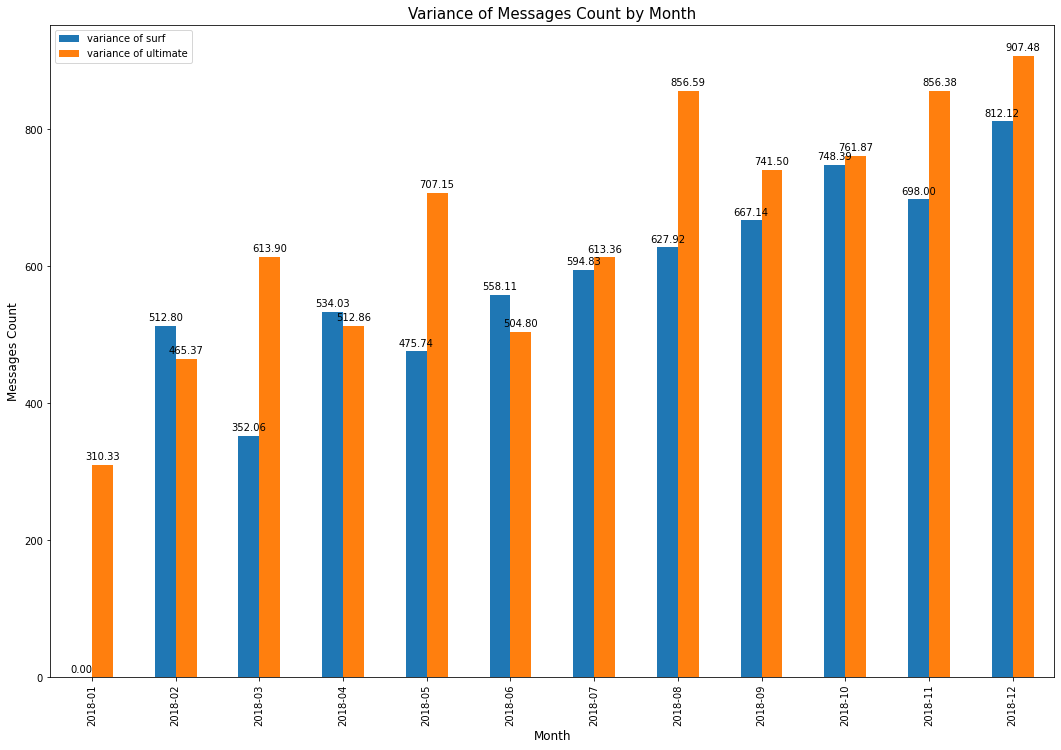

In [ ]:
messages_behavior2 =  analyze_messages.pivot_table(index=['month'], columns = ['plan'], values='messages_count', aggfunc=[py.var])
messages_behavior2.columns = ['variance of surf', 'variance of ultimate']
plots = messages_behavior2.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Messages Count', size=12)
plt.xlabel('Month', size=12)
plt.title('Variance of Messages Count by Month', size=15)

plt.show()

Secara umum pada distribusi nilai `variance` terjadi pola yang mirip dengan histogram `mean`, yaitu peningkatan bertahap dari bulan pertama hingga bulan ke dua belas. Sehingga dispersi atau persebaran data terbesar terjadi pada bulan dua belas pada customer paket `ultimate`. 

Selain itu ada hal yang menarik. `variance` paket `surf` pada bulan pertama nilainya `0`. Hal ini mungkin disebabkan karena datanya hanya ada 1, sehingga nilai `variance` nya tidak ada. Indikasi lainya karena nilai `mean`nya `21.00`. Kecil kemungkinan bisa terjadi nilai rata-rata yang terdiri dari beberapa data nilainya bulat tanpa desimal dibelakang koma. Saya akan memeriksa hal tersebut pada cell dibawah ini.

In [ ]:
analyze_messages.loc[(analyze_messages['plan'] == 'surf') & (analyze_messages['month'] == 1)]

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month,reg_month,churn_month


Betul hanya ada 1 data pengguna paket `surf` yang menggunakan layanan `messages` dibulan pertama. 

##### Standard Deviation of Messages Count by Month

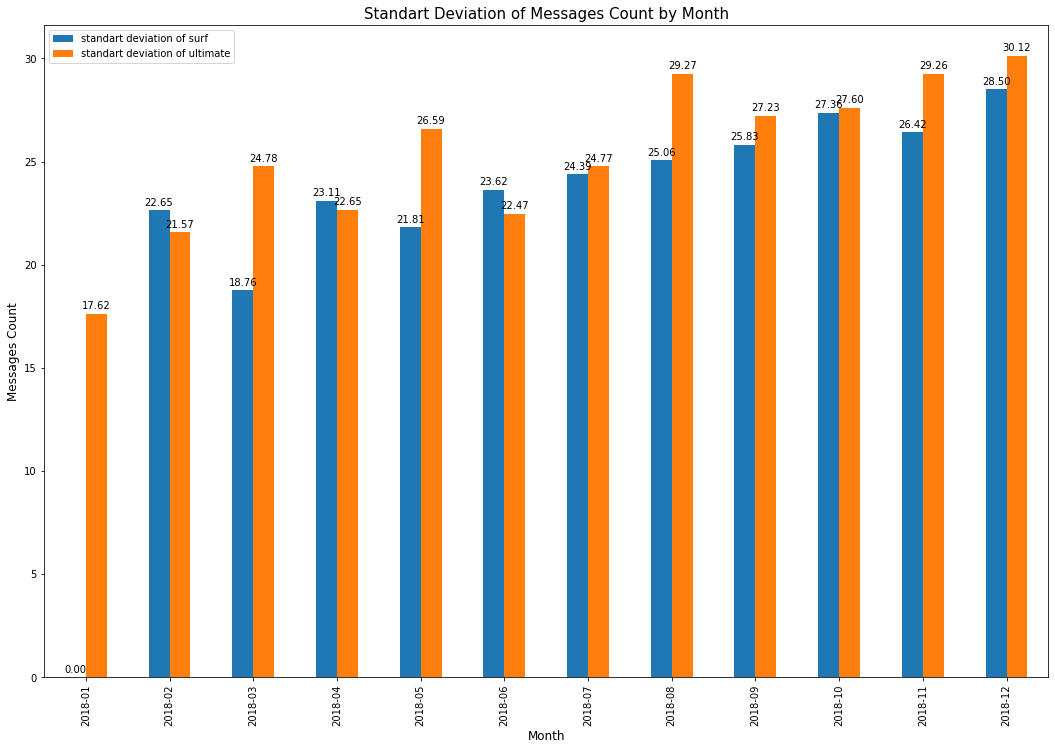

In [ ]:
messages_behavior3 =  analyze_messages.pivot_table(index=['month'], columns = ['plan'], values='messages_count', aggfunc=[py.std])
messages_behavior3.columns = ['standart deviation of surf', 'standart deviation of ultimate']
plots = messages_behavior3.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Messages Count', size=12)
plt.xlabel('Month', size=12)
plt.title('Standart Deviation of Messages Count by Month', size=15)

plt.show()

Pola distribusi pada `standart deviation` kurang lebih serupa karena `standart deviation` adalah akar dari `variance`. Nilai simpangan tertinggi pada paket `ultimate` dibulan ke-12, sebesar `30.12`. 

#### Internet

Seperti yang sebelumnya pertama saya akan melihat nilai `outlier`nya.

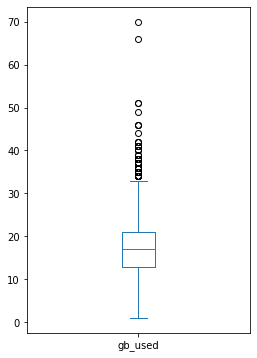

In [ ]:
df_revenue.loc[df_revenue['gb_used'] > 0, 'gb_used'].plot.box(figsize=(4,6))
plt.show()

dari visualisasi `boxplot` terlihat masih ada nilai `outlier`, namun sepertinya tidak sebanyak pada distribusi `calls` dan `messages`.

In [ ]:
internet_desc = df_revenue.loc[df_revenue['gb_used'] > 0, 'gb_used'].describe()
internet_desc

count    2277.000000
mean       16.989021
std         7.693683
min         1.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

In [ ]:
internet_upp_whis = find_upper_whisker(internet_desc)
internet_upp_whis

33.0

`Upper whisker`nya berada pada nilai 33.

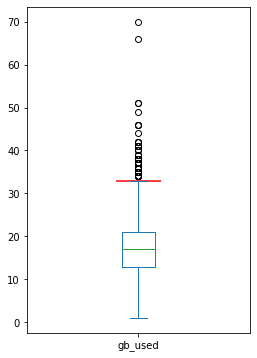

In [ ]:
df_revenue.loc[df_revenue['gb_used'] > 0, 'gb_used'].plot.box(figsize=(4,6))
plt.hlines(internet_upp_whis, xmin=0.9, xmax=1.1, color='red')
plt.show()

`Upper whisker` betul berada pada `33`, sesuai dengan teori. Selanjutnya saya kan melakukan filter untuk nilai diatas `upper whisker`, karena nilai `outlier` dapat mempengaruhi nilai `mean`.

In [ ]:
analyze_internet = df_revenue.loc[(df_revenue['gb_used'] <= upper_whisker) & (df_revenue['gb_used'] > 0)].copy()
analyze_internet.loc[analyze_internet['gb_used'] > upper_whisker]

,user_id,month,duration,gb_used,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_fee,call_over_quota,data_over_quota,messages_over_quota,revenue_per_user_per_month,reg_month,churn_month


Nilai `outlier`nya telah tidak ada. Karena itu saya akan melanjutkan ke tahap analisis.

##### Mean of Internet by Month

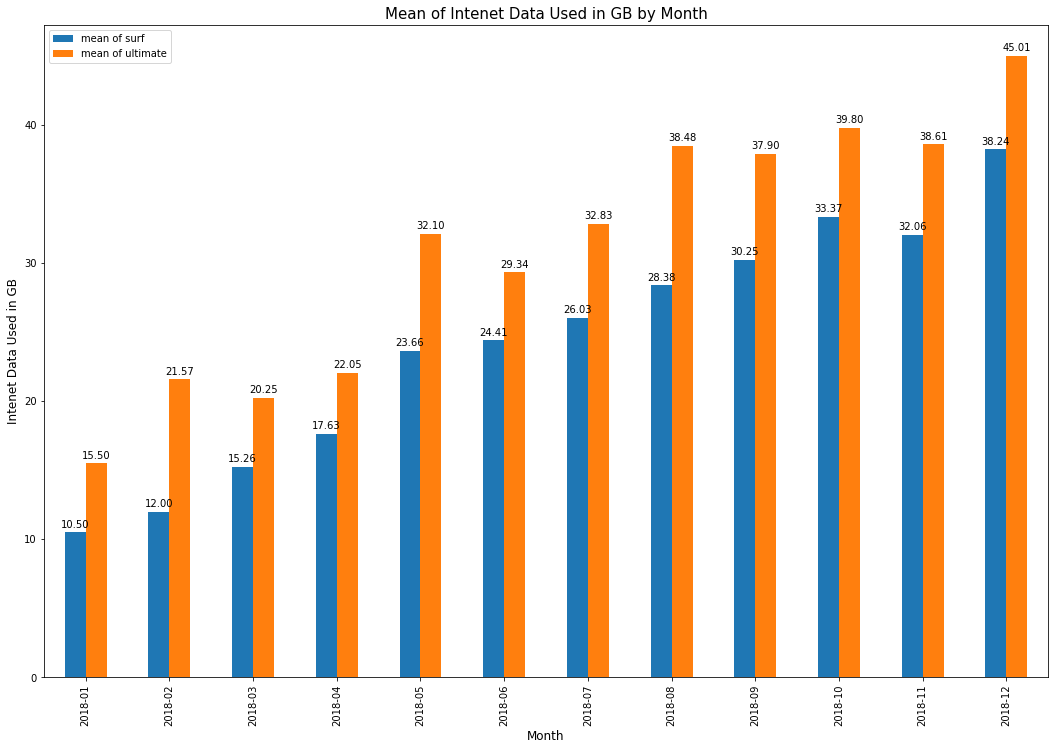

In [ ]:
internet_behavior =  analyze_internet.pivot_table(index=['month'], columns = ['plan'], values='messages_count', aggfunc=['mean'])

internet_behavior.columns = ['mean of surf', 'mean of ultimate']
plots = internet_behavior.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Intenet Data Used in GB', size=12)
plt.xlabel('Month', size=12)
plt.title('Mean of Intenet Data Used in GB by Month', size=15)

plt.show()

Pola distribusi penggunaan data `internet` dalam setiap bulan cukup serupa dengan pola distribusi `messages`. Dari awal bulan pertama hingga bulan kedua belas mengalami peningkatan bertahap, hingga memuncak dibulan kedua belas. Ada keunikan yang hanya muncul distribusi `internet`, yaitu nilai rata-ratanya diatas batas kuotanya. Baik pada konsumen paket `surf` yang batas kuotanya `15GB` dan paket `ultimate` yang batas kuotanya `30GB`. Mungkin hal ini menjadi indikasi layanan `internet` merupakan layanan yang paling diminati diantara ketiga layanan yang ada (`calls`, `messages`, dan `internet`).

Selain itu ada keunikan lain yaitu hanya pada distribusi `internet` rata-rata nilai konsumen paket `ultimate` secara konsisten setiap bulan selalu lebih tinggi dibandingkan konsumen paket `surf`.

##### Variance of Internet by Month

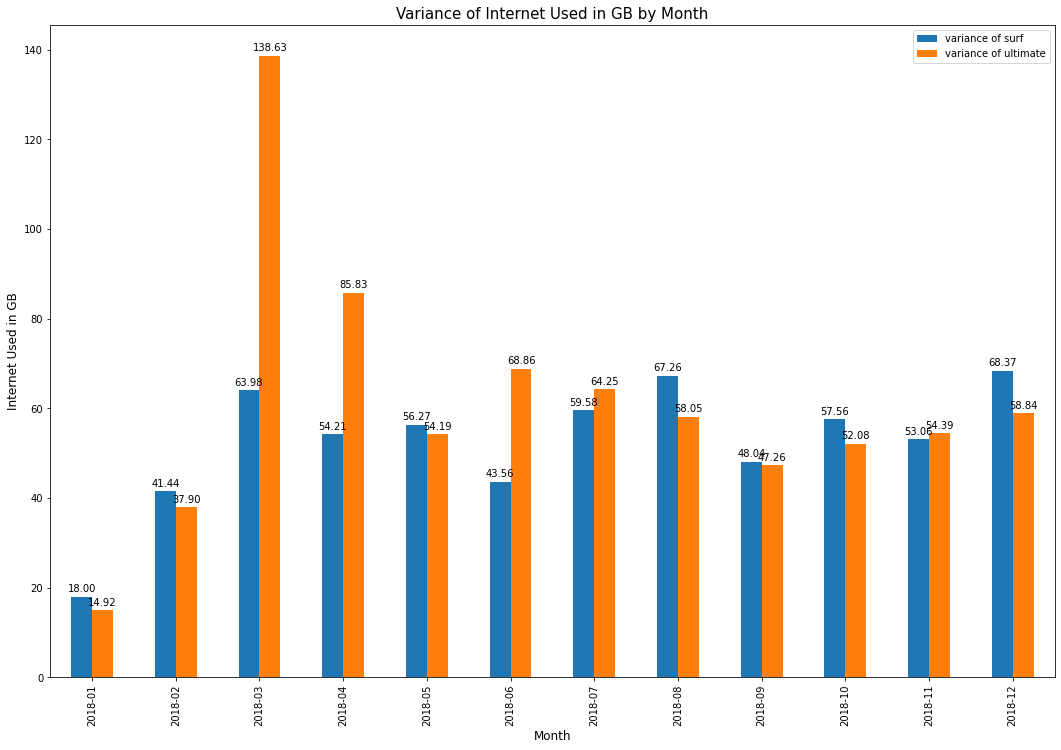

In [ ]:
internet_behavior2 =  analyze_internet.pivot_table(index=['month'], columns = ['plan'], values='gb_used', aggfunc=[py.var])
internet_behavior2.columns = ['variance of surf', 'variance of ultimate']
plots = internet_behavior2.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Internet Used in GB', size=12)
plt.xlabel('Month', size=12)
plt.title('Variance of Internet Used in GB by Month', size=15)

plt.show()

Pada distribusi `variance`nya tidak seperti distribusi `mean` yang meningkat secara bertahap hingga akhir bulan. Hal ini menunjukan nilai tingginya `variance` tidak selalu diikuti dengan tingginya nilai `mean`. Hal tersebut hanya menunjukan ada disparitas atau sebaran nilai yang besar. Hal yang menarik nilai `variance` paket `ultimate` dibulan ketiga mengalami lonjakan yang menjadi nilai `variance` tertinggi.

##### Standart Deviation of Internet by Month

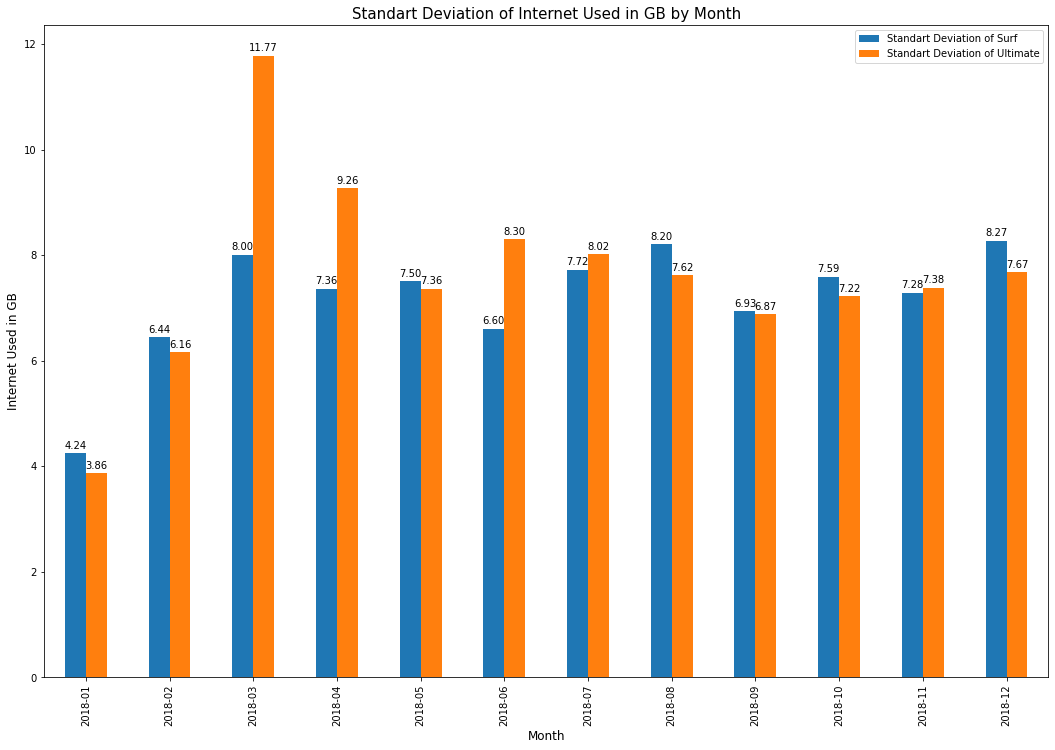

In [ ]:
internet_behavior3 =  analyze_internet.pivot_table(index=['month'], columns = ['plan'], values='gb_used', aggfunc=[py.std])
internet_behavior3.columns = ['Standart Deviation of Surf', 'Standart Deviation of Ultimate']
plots = internet_behavior3.plot(kind='bar', figsize=(18,12))

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.ylabel('Internet Used in GB', size=12)
plt.xlabel('Month', size=12)
plt.title('Standart Deviation of Internet Used in GB by Month', size=15)

plt.show()

Pola secara umum pada `standart deviation` serupa dengan pola `variance` karena nilai `standart deviation` adalah akar dari `variance`. Nilai `standart deviation` tertinggi terjadi pada bulan ketiga pada pengguna paket `ultimate` dengan simpangan sebesar  `11.77`.

## Uji Hipotesis

### Pendapatan Megaline dari Konsumen `Ultimate` Lebih Besar Dibandingkan Pendapatan Dari Konsumen `Surf`

Berdasarkan dari data rata-rata penggunaan layanan perbulan. Sepertinya terlihat konsumen paket `ultimate` pengunaan layanannya lebih tinggi relatif lebih tinggi, terutama pada penggunaan layanan `internet`. Hal terebut mungkin disebabkan kuota paket `ultimate` memiliki kuota yang lebih besar. Disertai juga dengan biaya per bulan paket `ultimate` yang 3x lipat lebih besar dibandingkan biaya per bulan paket `surf`.  Namun apakah konsumen paket `ultimate` memberikan pendapatan yang lebih besar kepada `Megaline`? Hal tersebut akan diuji pada tahap ini.

Sebelum memulai pengujian statistik, Saya akan membuat hipotesisnya. Berikut hipotesisnya:
- Hipotesis Nol: Pendapatan rata-rata Megaline dari konsumen paket `Ultimate` sama dibandingkan pendapatan rata-rata dari konsumen paket `Surf`.
- Hipotesis Alternatif: Pendapatan rata-rata Megaline dari konsumen paket `Ultimate` tidak sama dibandingkan pendapatan rata-rata dari konsumen paket `Surf`.

In [ ]:
df_revenue_ult = df_revenue.loc[df_revenue['plan'] == 'ultimate'].copy()
df_revenue_surf = df_revenue.loc[df_revenue['plan'] == 'surf'].copy()

In [ ]:
def h_testing_ind(samp1, samp2, alpha, tail) :
    result = st.ttest_ind(samp1, samp2)
    pval = result.pvalue
    
    if tail == 1 :
        if (samp1.mean() > samp2.mean()) and (alpha > pval):
            print('P-Value adalah: '+ str(pval/2))
            print ('Kita menolak hipotesis nol')
            return
        else :
            print('P-Value adalah: '+ str(pval/2))
            print ('Kita tidak dapat menolak hipotesis nol')
            return
    elif tail == 2:
        if alpha > pval :
            print('P-Value adalah: '+ str(pval))
            print ('Kita menolak hipotesis nol')
            return
        else :
            print('P-Value adalah: '+ str(pval))
            print ('Kita tidak dapat menolak hipotesis nol')
            return
    else :
        print('Error, parameter tail hanya antara 1 atau 2')
        return

Karena saya berencana melakukan pengujian lebih dari satu kali, maka saya akan membuat fungsi terlebih dahulu.

In [ ]:
h_testing_ind(df_revenue_ult['revenue_per_user_per_month'], df_revenue_surf['revenue_per_user_per_month'], 0.05, 2)

P-Value adalah: 2.862674510698644e-08
Kita menolak hipotesis nol


`P-Value`nya lebih kecil dari `alpha` yang ditentukan `0.05` atau `5%`. Artinya rata-rata pendapatan `Megaline` dari konsumen paket `ultimate` secara signifikan `tidak sama` dengan rata-rata pendapatan  dari konsumen paket `surf`. Saya menduga rata-rata konsumen paket `ultimate` lebih tinggi dibandingkan konsumen paket `surf`. Karena biaya bulanan `ultimate` yang jauh lebih tinggi dibandingkan biaya bualanan paket `surf`. Biaya bulanan `ultimate` lebih dari 3x lipat dari biaya bulanan `surf`. Untuk memastikan saya akan memeriksa ulang rata-rata pendapatan dari masing-masing kelompok konsumen.

In [ ]:
ult_rev_mean = df_revenue_ult['revenue_per_user_per_month'].mean()
surf_rev_mean = df_revenue_surf['revenue_per_user_per_month'].mean()

print('Pendapatan rata-rata konsumen paket surf: '+ str(surf_rev_mean))
print('Pendapatan rata-rata konsumen paket ultimate: '+ str(ult_rev_mean))

Pendapatan rata-rata konsumen paket surf: 60.706408137317226
Pendapatan rata-rata konsumen paket ultimate: 72.31388888888888


Hasilnya rata-rata pendapatan dari konsumen paket `ultimate` sebesar `72.3`. Lebih besar dibandingkan rata-rata pendapatan dari konsumen paket `surf` sebesar `60.7`.

Selain itu ada hal yang menarik. Meskipun rata-rata pendapatan dari paket `surf` lebih rendah, tetapi rata-ratanya jauh lebih tinggi dibandingkan biaya bulanannya. Artinya rata-rata pendapatan dari konsumen paket `surf` didapatkan dari banyaknya biaya tambahan.

### Pendapatan Megaline dari Konsumen di Area `New York-New Jersey` Lebih Besar Dibandingkan Pendapatan Dari Konsumen di Area Lainnya

`New York - New Jersey` adalah salah satu daerah terkaya di Amerika. Menurut `New York Post` pada artikel berikut https://nypost.com/2022/07/29/jersey-city-is-now-americas-most-expensive-city-to-live-in/, `New Jersey` sudah menjadi kota dengan biaya hidup termahal di Amerika. Oleh karena ada kemungkinan rata-rata pendapatan `Megaline` dari konsumen di daerah `New York - New Jersey` berbeda dibandingkan konsumen di daerah lainnya. Sekarang saatnya mengujinya secara statistik. 

Sebelum memulai pengujian statistik, Saya akan membuat hipotesisnya. Berikut hipotesisnya:
- Hipotesis Nol: Pendapatan rata-rata Megaline dari konsumen di area `NY-NJ` sama dibandingkan pendapatan rata-rata dari konsumen area lainnya.
- Hipotesis Alternatif: Pendapatan rata-rata Megaline dari konsumen di area `NY-NJ` tidak sama dibandingkan pendapatan rata-rata dari konsumen area lainnya.

In [ ]:
df_revenue_NY_NJ = df_revenue.loc[df_revenue['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'].copy()
df_revenue_others = df_revenue.loc[df_revenue['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'].copy()

In [ ]:
h_testing_ind(df_revenue_NY_NJ['revenue_per_user_per_month'], df_revenue_others['revenue_per_user_per_month'], 0.05, 2)

P-Value adalah: 0.043557431621342436
Kita menolak hipotesis nol


`P-Value` nya lebih kecil dari `0.05` artinya pendapatan rata-rata `Megaline` dari konsumen di area `NY-NJ` secara signifikan tidak sama dengan dengan pendapatan rata-rata dari konsumen di area lainnya. Saya menduga pendapatan konsumen di area `NY-NJ` lebih besar dibandingkan rata-rata pendapatan konsumen di area lainnya. Karena `NY-NJ` adalah salah satu area dengan ekonomi terbesar di Amerika. Hal tersebut akan saya periksa selanjutnya.

In [ ]:
(df_revenue_NY_NJ['revenue_per_user_per_month'].mean(), df_revenue_others['revenue_per_user_per_month'].mean())

print('Pendapatan rata-rata konsumen di area NY-NJ: '+ str(df_revenue_NY_NJ['revenue_per_user_per_month'].mean()))
print('Pendapatan rata-rata konsumen di area lainnya: '+ str(df_revenue_others['revenue_per_user_per_month'].mean()))

Pendapatan rata-rata konsumen di area NY-NJ: 59.921352785145885
Pendapatan rata-rata konsumen di area lainnya: 65.2227713987474


Setelah diperiksa ternyata sebaliknya, pendapatan rata-rata konsumen dari area `NY-NJ` sebesar `59.92`, lebih kecil dibandingkan pendapatan rata-rata area lainnya sebesar  `65.22`. Artinya dalam konteks konsumen `Megaline`, status `NY-NJ` sebagai salah satu area dengan ekonomi terbesar di Amerika tidak mempengaruhi perilaku pembelian konsumen di area `NY-NJ` menjadi lebih besar dibandingkan konsumen di area lainnya. 

Saya menduga pendapatan didaerah `NY-NJ` lebih rendah dikarenakan proporsi pengguna paket `ultimate`nya lebih rendah dibandingkan didaerah lainnya. Selanjutnya saya akan memeriksa hal tersebut. 

In [ ]:
df_revenue_NY_NJ['plan'].value_counts(normalize=True)

surf        0.827586
ultimate    0.172414
Name: plan, dtype: float64

In [ ]:
df_revenue_others['plan'].value_counts(normalize=True)

surf        0.658142
ultimate    0.341858
Name: plan, dtype: float64

Proporsi konsumen `ultimate` di daerah selain `NY-NJ` 2x lipat lebih tinggi dibandingkan proporsi konsumen `ultimate` di daerah `NY-NJ`. Dari 2 kali uji hipotesis yang dilakukan, `plan` atau paket yang bulanan yang dibeli konsumen lebih berpengaruh ke pendapatan `Megaline`.

## Kesimpulan

Setelah dari analisa data dan uji hipotesis ada beberapa poin yang saya temukan. Poin pertama adalah `internet` adalah layanan yang paling diminati oleh konsumen. Berdasarkan dari analisa data, rata-rata penggunaan `internet` dibeberapa bulan diatas kuota `plan` atau paket. Sedangkan pada layanan `calls` dan `messages` justru sebaliknya, rata-ratanya dibawah kuota. Terutama pada `plan` atau paket `ultimate`, jaraknya masih jauh dibawah kuota. Mungkin akan lebih baik, kuota `messages` dan `calls` dialihkan ke penambahan kuota `internet`.  

Berdasarkan dua kali uji hipotesis yang dilakukan paket atau `plan` lebih mempengaruhi terhadap pendapatan `Megaline`. Pada saat pengujian kedua yang hasilnya konsumen di area `NY-NJ` lebih rendah dibandingkan area lainnya. Setelah diperiksa ternyata proporsi konsumen dengan paket `ultimate` di area `NY-NJ` hanya `17%` hanya setengahnya dari proporsi konsumen paket `ultimate` di area lainnya yang sebesar `34%`. Artinya paket atau `plan` lebih mempengaruhi pendapatan rata-rata 

Berdasarkan eksplorasi, analisis, dan uji hipotesis yang telah dilakukan sebelumnya. Kami merekomendasikan perlunya `Megaline` membuat `plan` atau paket yang biaya bulanannya diantara `surf` dan `ultimate`. Karena menurut saya perbedaan biaya bulanan antara paket `surf` dengan `ultimate` terlalu jauh. Selain itu dapat dilihat pendapatan rata-rata dari konsumen `surf` yang sebesar `$60.7` jauh diatas biaya bulanannya. Artinya banyak kebutuhan konsumen yang belum terpenuhi sehingga konsumen perlu membayar biaya tambahan.    